<font color='blue'> Привет. Извини за долгую проверку. Ниже мои комментарии выделены синим. </font>

### Шаг 4. Аналитика средствами Python
У нас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.   
1. `/datasets/query_1.csv` — результат первого запроса.   
В нём содержится информация о:  
`model` — модели самолета   
`flights_amount` — количество рейсов для каждой модели самолетов model в сентябре 2018 года
2. `/datasets/query_3.csv` — результат третьего запроса.   
В нём содержится информация о:  
`city` — городах  
`average_flights` — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года  

#### Для этих двух наборов данных нужно:
1. импортировать файлы;  
1. изучить данные в них;  
1. проверить типы данных на корректность;  
1. выбрать топ-10 городов по количеству рейсов;  
1. построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;   
1. сделать выводы по каждому из графиков, пояснить результат.  

##### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

##### Импортируем файлы и изучим данные в них

In [2]:
plane = pd.read_csv('/datasets/query_1.csv') # читаем файл
plane.head(10) # посмотрим что есть в данных

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
plane.info() # смотрим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Данные по самолетам `plane`: дублей, пропущенных значений нет. Данные корректного типа

In [4]:
flights = pd.read_csv('/datasets/query_3.csv') # читаем файл
flights.head(10) # посмотрим что есть в данных

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [5]:
flights.info() # смотрим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Пропущенных значений нет

Проверим дубли

In [6]:
flights.duplicated().sum()

0

Дублей нет. Данные корректного типа

<font color='blue'> Отлично, данные достаточно чистые, можно работать. </font>

Найдем топ-10 городов по количеству рейсов

In [7]:
top_cities = flights.sort_values('average_flights', ascending=False).reset_index().head(10).drop(['index'], axis=1)
top_cities

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


Построим график модели самолетов и количество рейсов

In [8]:
plane_plot = plane.sort_values('flights_amount', ascending=False) # отсортируем по убыванию для более удобного прочтения графика

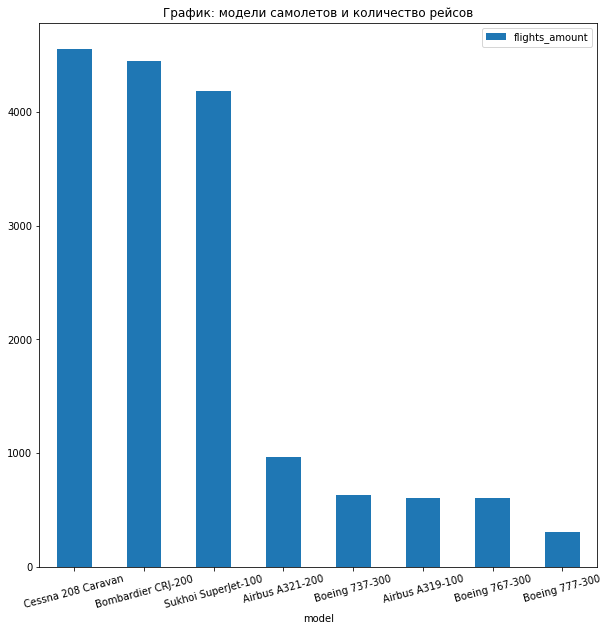

In [9]:
(plane_plot
 .plot(x = 'model'
       , y = 'flights_amount'
       , figsize = (10,10)
       , title = 'График: модели самолетов и количество рейсов'
       , kind = 'bar'
       , rot = 15
       )
)

##### Вывод: Как и жидалось, больше всего рейсов делают маленькие самолеты на короткие дистанции (Цессна, Бомбардье). А широкофюзеляжный дальнемагстрал Б-777 за это же время успевает налетать в разы меньше

Построим график города и количество рейсов

In [10]:
cities_plot = flights.sort_values('average_flights', ascending=False)

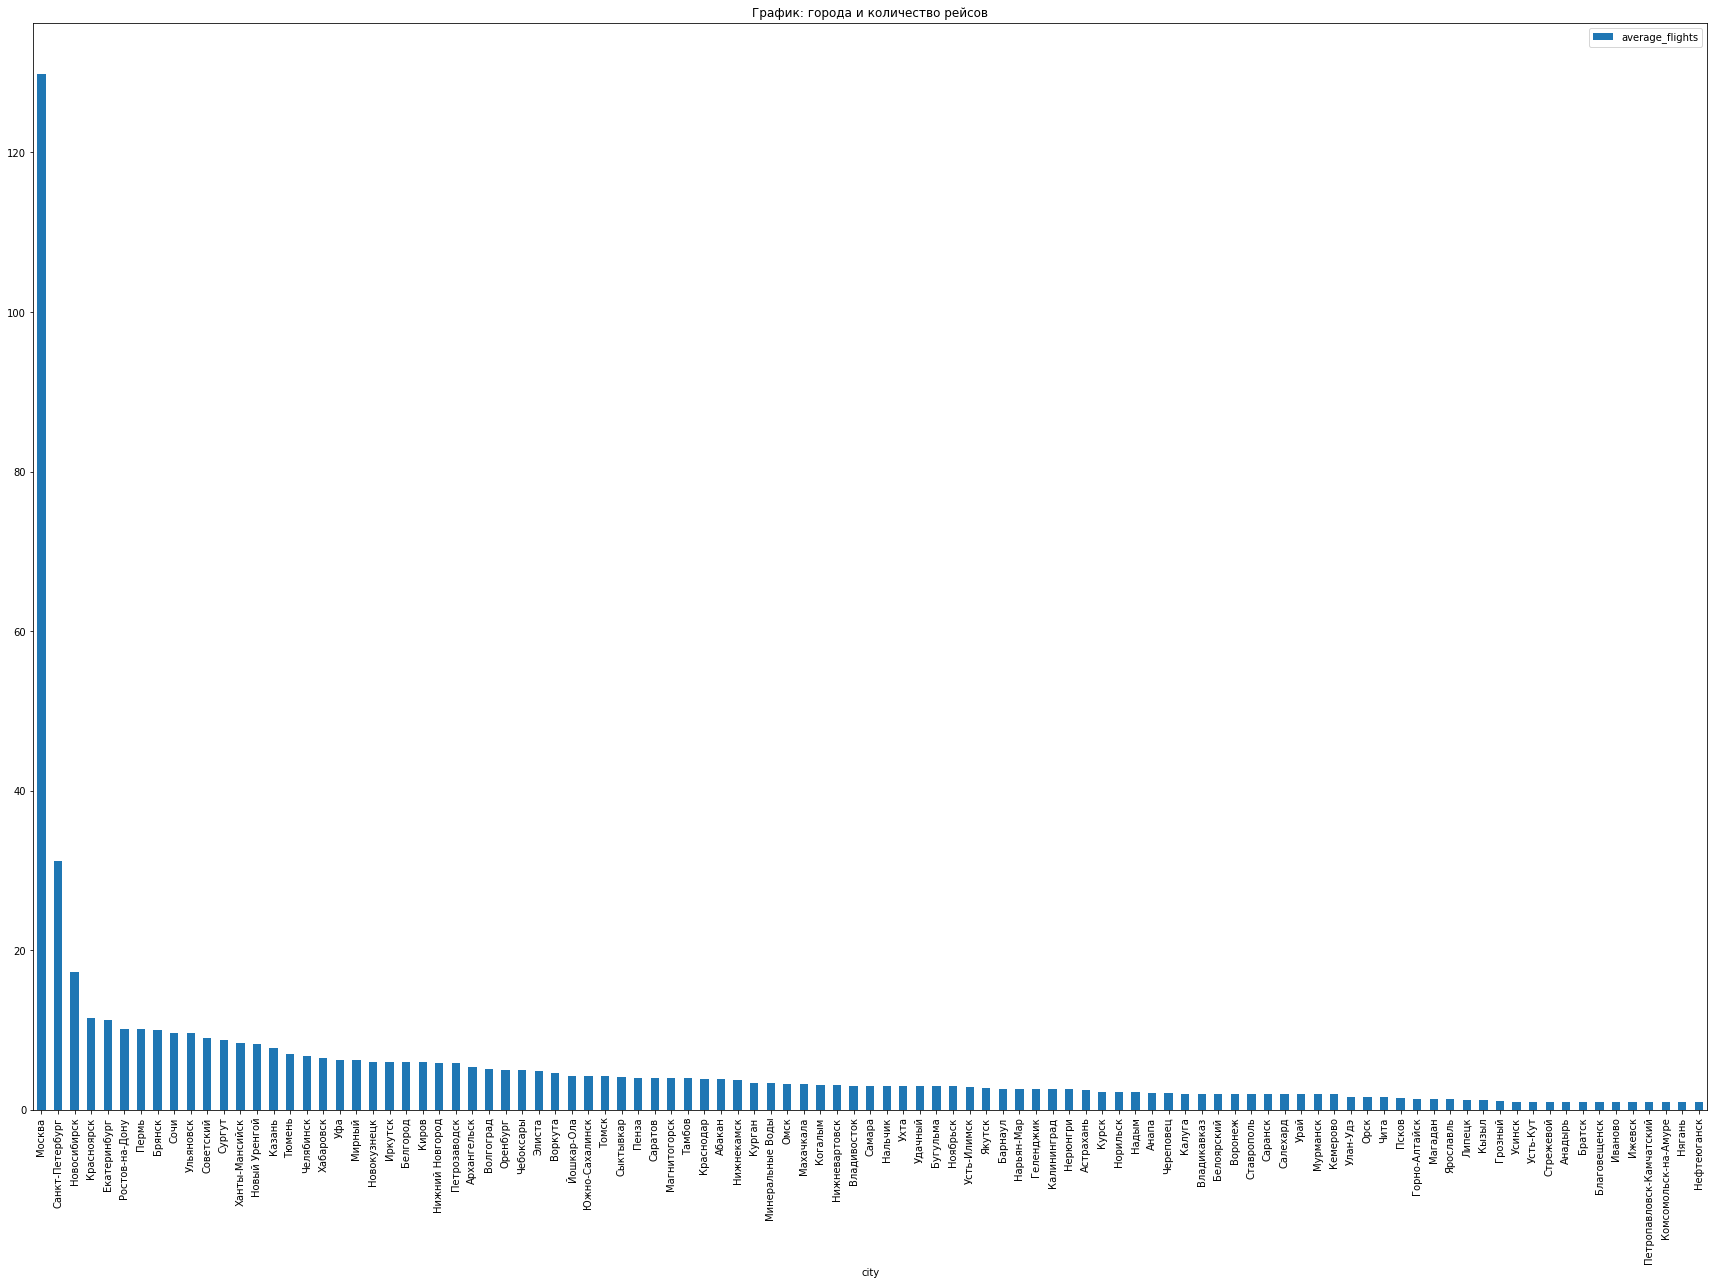

In [11]:
(cities_plot
 .plot(x = 'city'
       , y = 'average_flights'
       , figsize = (30,20)
       , title = 'График: города и количество рейсов'
       , kind = 'bar'
       , rot = 90
       )
)

##### Вывод: городов очень много, на графике смотреть не удобно.  При этом явный лидер с многократным отрывом - это Москва. Так и есть - Москва крупнейший транспортный хаб страны 

Построим график топ-10 городов и количество рейсов

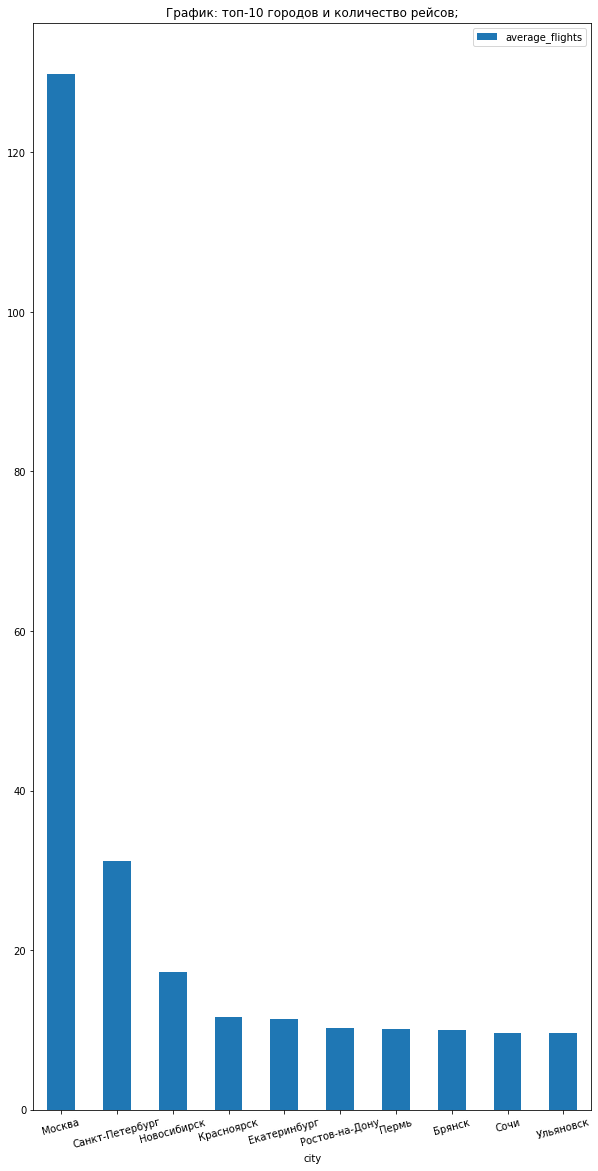

In [12]:
(top_cities
 .plot(x = 'city'
       , y = 'average_flights'
       , figsize = (10,20)
       , title = 'График: топ-10 городов и количество рейсов;'
       , kind = 'bar'
       , rot = 15
       )
)

##### Вывод: Явные лидеры - это Москва, С-Петербург и Новосибирск. Остальные в топе идут почти с одинаковым количеством рейсов

<font color='blue'> Отлично, лидеры по количеству рейсов выделенфы правильно. Графики построены верно. </font>

### Шаг 5. Проверка гипотезы средствами Python
`/datasets/query_last.csv` — результат последнего запроса.  
В нём следующая информация:  
1. `week_number` — номер недели;  
1. `ticket_amount` — количество проданных билетов за неделю;  
1. `festival_week` — есть ли на этой неделе фестиваль;  
1. `festival_name` — название фестиваля.  

##### Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».  
Пороговое значение alpha задайте самостоятельно.  
Поясните:  
как вы формулировали нулевую и альтернативную гипотезы;  
какой критерий использовали для проверки гипотез и почему.

In [13]:
festival_data = pd.read_csv('/datasets/query_last.csv') # читаем файл
festival_data.head(10) # посмотрим что есть в данных

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [21]:
festival_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


Подготовим датасет - отберем количество билетов в разные недели

In [17]:
tickets_fest = festival_data.query('festival_week != "NaN"')['ticket_amount']  
tickets_usual = festival_data.query('festival_week == "NaN"')['ticket_amount']  

Нулевая гипотеза H<sub>0</sub> должна содержать равенство. Следовательно H<sub>0</sub> будет звучать как "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время"
А проверять мы будем альтернативную гипотезу H<sub>А</sub>  "Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время»"
Если объемы выборок n<100, то порог отклонения H<sub>0</sub>  целесообразно выбрать до α=0,1 и принимать решение о наличии связи (различий) при р≤0,1

In [18]:
tickets_fest.var()/tickets_usual.var() #  определим соотношение дисперсий для параметра equal_var

1137.3246077224985

In [22]:
alpha = .1 # критический уровень статистической значимости (объем выборки меньше 100 - 3 и 7 соответственно)
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    tickets_fest, 
    tickets_usual,
    equal_var = False) #дисперсия отличается в тысячи раз

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


##### Нулевая H<sub>0</sub> гипотеза не отвергнута, значит ""Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время"

In [20]:
tickets_usual.var()

17143.476190476194

<font color='blue'> Гипотезы сформулированы и проверены верно. Молодец, что посмотрел дисперсии и настроил параметр equal_var. </font>


<font color='blue'> Эта часть проекта выполнена отлично. Молодец, что пишешь достаточно комментариев даже в таком небольшом проекете. Удачи в следующих проектах. </font>